In [2]:
import numpy as np 
from dtw import *
import pandas as pd
import os
import matplotlib.pyplot as plt

Importing the dtw module. When using in academic works please cite:
  T. Giorgino. Computing and Visualizing Dynamic Time Warping Alignments in R: The dtw Package.
  J. Stat. Soft., doi:10.18637/jss.v031.i07.



In [3]:
folder = '../data/SMCi/circular_traj'
fn = "cartesian_L_5_K_1_alpha_0.0_beta_0.1_gamma_0.9_delta_0.1_t_30_uncertainty_1.0.csv"
path = os.path.join(folder, fn)
df= pd.read_csv(path)

In [4]:
df.head()


,t,x_med,y_med,z_med,dx_med,dy_med,dz_med,ddx_med,ddy_med,ddz_med,...,K4,K5,K6,u1,u2,u3,u4,u5,u6,J
0,0.00,0.500013,-3.367987e-09,-1.893712e-09,0.000849,-6.446181e-08,-2.177439e-07,0.084872,-0.000005,-0.000022,...,1.0,1.0,1.0,0.016546,-40.827837,-8.558697,1.305313,-0.000226,0.000002,1.171378
1,0.01,0.500034,8.394729e-08,1.009626e-08,0.001670,5.826222e-06,7.339143e-07,0.082083,0.000591,0.000096,...,1.0,1.0,1.0,0.018175,-40.833365,-8.556263,1.305373,-0.000226,0.000002,0.789649
2,0.02,0.500062,3.133617e-07,5.347735e-08,0.002464,1.729383e-05,3.151977e-06,0.079456,0.001150,0.000242,...,1.0,1.0,1.0,0.019757,-40.839591,-8.554168,1.305432,-0.000225,0.000002,0.667728
3,0.03,0.500098,7.381604e-07,1.423185e-07,0.003233,3.418314e-05,6.999364e-06,0.076908,0.001693,0.000386,...,1.0,1.0,1.0,0.021296,-40.846204,-8.552311,1.305489,-0.000225,0.000001,0.562691
4,0.04,0.500142,1.410146e-06,2.903344e-07,0.003978,5.634289e-05,1.223987e-05,0.074437,0.002222,0.000525,...,1.0,1.0,1.0,0.022793,-40.853193,-8.550685,1.305544,-0.000225,0.000001,0.472600


In [6]:
alignment = dtw(df['x_med'].to_numpy(), df['x_ref'].to_numpy(), keep_internals=True)
print(alignment.distance)

for t in avg(m(t)-r(t))



for t, k in avg(m(t-k)-r(t))

10.075149871165815


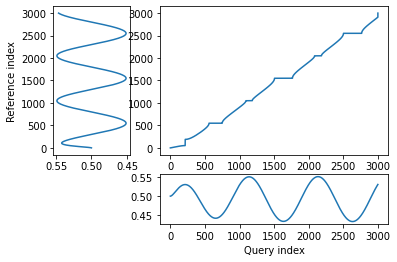

<AxesSubplot:>

In [7]:
alignment.plot(type="threeway")

In [ ]:
|[2][3][2][0]
|[1][3][0][3]
|[1][2][1][3]
|[0][3][1][3]
------------




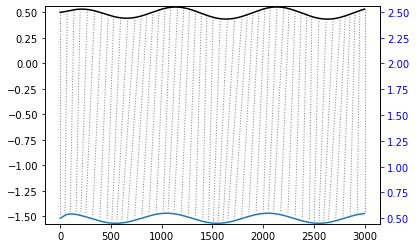

<AxesSubplot:>

In [8]:
dtw(df['x_med'].to_numpy(), df['x_ref'].to_numpy(), keep_internals=True, 
    step_pattern=rabinerJuangStepPattern(6, "c"))\
    .plot(type="twoway",offset=-2)